## Description

The dataset provides the average traffic speed per hour for a major road in Hong Kong from 2017 to 2018. Part of the dataset is provided as the training data, and your task is to predict the rest. 80% of the dataset is provided as the training data and 20% as the testing data, including the timestamp and the corresponding average speed. We sampled the testing data only from the year 2018 to provide you a training dataset that has the complete data spanning the year 2017. However, the speed information is sometimes missing due to device malfunction.

You have to submit the predicted results of these testing samples, which are then compared with the ground truth to evaluate the performance of your model.

## Insights

1. I split the train data into: year, day and hour 1 Label: Speed.
2. I am assuming that is really important to predict Y based on 2 features: day and hour I split train samples (subsplitting) as following: 80% for training and 20% for testing taking all features and label.
3. After running 2 models, linear regression an KNeighborsR, it predict the speed best the KNR, for the last model, I am using n_neighbors= 24 for every hour.
4. I am training the model in train.csv with 14,005 samples and predicting the speed in the test.csv with 3503 samples.

### Assumptions
1. Identified weekends and holidays from the data for 2017 to 2018 in Hong Kong, these days will be identified as another feature "day_type": weekend, holiday,statutory and normal. This amend will be change directly in EXCEL CSV file

2. Create one feature for seasons based on week calendar 2017 and 2018, the feature was called "Seasons": Spring, Summer, Autumn, Winter.

3.- Create 2 features focus on weather, my hyphotesis is that days with more rainfall generates more traffic because makes difficult the driving. For the other feature I am counting the days for each month that has strom and typos in Hong Kong.


### Useful links

#### Holidays
https://www.gov.hk/en/about/abouthk/holiday/2017.htm

https://www.gov.hk/en/about/abouthk/holiday/2017.htm


### Statutory holidays 2017

The first day of January (1 January)
Lunar New Year’s Day (28 January)
The third day of Lunar New Year (30 January)
The fourth day of Lunar New Year (31 January)
Ching Ming Festival (4 April)
Labour Day (1 May)
Tuen Ng Festival (30 May)
Hong Kong Special Administrative Region Establishment Day (1 July)
National Day (1 October)
The day following the Chinese Mid-Autumn Festival (5 October)
Chung Yeung Festival (28 October)
Chinese Winter Solstice Festival (22 December) or Christmas Day (25 December) (at the option of the employer)

### Statutory holidays 2018

The first day of January (1 January)
Lunar New Year’s Day (16 February)
The second day of Lunar New Year (17 February)
The fourth day of Lunar New Year (19 February)
Ching Ming Festival (5 April)
Labour Day (1 May)
Tuen Ng Festival (18 June)
Hong Kong Special Administrative Region Establishment Day (1 July)
The day following the Chinese Mid-Autumn Festival (25 September)
National Day (1 October)
Chung Yeung Festival (17 October)
Chinese Winter Solstice Festival (22 December) or Christmas Day (25 December) (at the option of the employer)

#### Weekends, 2017 and 2018

https://www.timeanddate.com/calendar/?year=2017&country=42

https://www.timeanddate.com/calendar/?year=2018&country=42


### Seasons

https://www.travelchinaguide.com/climate/hongkong.htm

https://en.wikipedia.org/wiki/Season


### Rainfall and Storm and typos in Hong Kong for 2017 and 2018


https://www.hko.gov.hk/en/cis/statistic.htm


## Road Map in Kaggle Competition
### Records from tries

First intent:
1. Analyze the train and testing data, see samples and identifies features and labels 3 Features from data ad 1 feature created: I split the train data into: year, day and hour 1 Label: Speed. It was created 2 new features called "day_type" and "seasons".

2. I am assuming that is really important to predict Y based on 2 features: day and hour I split train samples (subsplitting) as following: 80% for training and 20% for testing taking all features and label.

3. After running 2 models, linear regression an KNeighborsR, it predict the speed best the KNR, for the last model, I am using n_neighbors= 24 for every hour.

4. I am training the model in train.csv with 14,005 samples and predicting the speed in the test.csv with 3503 samples.


Second intent: Amend 1 step 2, change partition 90% / 10%. X day Y Speed

Third initent: Concatenate Day and hour for X, 12 n_neighbors

fourth intent: 288 n_neighbors, days * months

sixth intent : 12 neighbors

Eight intent: change X variable adding year

nineth intent: 13999 observations for dftrain, drop 7 outliers rows 

13th : Random Forest Regressor with Random State 12 and 24 (same) and feature "day_type" was changed for:

        statutory  2

        holiday    1

        weekend   0.5

         normal     0


14th : Random Forest Regressor with Random State 12 and 24 (same) and Data cleaning 1.8 Standard deviation for Speed

15th : Decision Tree Regressor with Data Cleaning 1.8 Standard deviation for Speed

16th :  Random Forest Regressor with Random State 24 (same) and Data cleaning 1.8 Standard deviation for Speed

17th: Runinng again the models, now "seasons"  was changed for : 

          winter   1

          spring   2

          summer   3

          autumn   4

18th: Adding 2 new features to my data, days with storm per month and rainfall days.


Note: For this exercise, I am using the next libraries in python: numpy, pandas, sklearn and matplotlib.

In [1]:
# Libraries used for this competition
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.linear_model as skl
import numpy as np
from sklearn.neighbors import KernelDensity
from sklearn.metrics import mutual_info_score
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score ,confusion_matrix


## EDA

In [2]:
dfsample = pd.read_csv('sampleSubmission.csv')
print(dfsample.head())
dfsample.info(), dfsample.describe()

   id  speed
0   0      0
1   1      0
2   2      0
3   3      0
4   4      0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3504 entries, 0 to 3503
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      3504 non-null   int64
 1   speed   3504 non-null   int64
dtypes: int64(2)
memory usage: 54.9 KB


(None,
                 id   speed
 count  3504.000000  3504.0
 mean   1751.500000     0.0
 std    1011.661999     0.0
 min       0.000000     0.0
 25%     875.750000     0.0
 50%    1751.500000     0.0
 75%    2627.250000     0.0
 max    3503.000000     0.0)

In [3]:
dftrain = pd.read_csv('train.csv')
print(dftrain.head())
dftrain.info(), dftrain.describe()

datawithzeroes = dftrain.copy()
dftrain['speed']= dftrain['speed'].replace(0,np.NaN)

#Check misiing values
dftrain.isnull().values.any()
dftrain.isnull().any()

   id           date      speed  day_type  seasons  rainfall  storm_days
0   0  1/1/2017 0:00  43.002930       2.0        1        11           0
1   1  1/1/2017 1:00  46.118696       2.0        1        11           0
2   2  1/1/2017 2:00  44.294158       2.0        1        11           0
3   3  1/1/2017 3:00  41.067468       2.0        1        11           0
4   4  1/1/2017 4:00  46.448653       2.0        1        11           0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14006 entries, 0 to 14005
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          14006 non-null  int64  
 1   date        14006 non-null  object 
 2   speed       14006 non-null  float64
 3   day_type    14006 non-null  float64
 4   seasons     14006 non-null  int64  
 5   rainfall    14006 non-null  int64  
 6   storm_days  14006 non-null  int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 766.1+ KB


id            False
date          False
speed         False
day_type      False
seasons       False
rainfall      False
storm_days    False
dtype: bool

In [4]:
DFtest = pd.read_csv('test.csv')
print(DFtest.head())
DFtest.info(), DFtest.describe()

   id            date  day_type  seasons  rainfall  storm_days
0   0   1/1/2018 2:00       2.0        1        15           0
1   1   1/1/2018 5:00       2.0        1        15           0
2   2   1/1/2018 7:00       2.0        1        15           0
3   3   1/1/2018 8:00       2.0        1        15           0
4   4  1/1/2018 10:00       2.0        1        15           0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3504 entries, 0 to 3503
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          3504 non-null   int64  
 1   date        3504 non-null   object 
 2   day_type    3504 non-null   float64
 3   seasons     3504 non-null   int64  
 4   rainfall    3504 non-null   int64  
 5   storm_days  3504 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 164.4+ KB


(None,
                 id     day_type      seasons     rainfall   storm_days
 count  3504.000000  3504.000000  3504.000000  3504.000000  3504.000000
 mean   1751.500000     0.207905     2.519692    18.488870     3.186073
 std    1011.661999     0.410500     1.127175     5.464744     4.489487
 min       0.000000     0.000000     1.000000    11.000000     0.000000
 25%     875.750000     0.000000     1.750000    13.000000     0.000000
 50%    1751.500000     0.000000     3.000000    17.000000     1.000000
 75%    2627.250000     0.500000     4.000000    22.000000     3.000000
 max    3503.000000     2.000000     4.000000    28.000000    15.000000)

In [5]:
dftest = pd.read_csv('test.csv')
print(dftest.tail(30))
dftest.info(), dftest.describe()

        id              date  day_type  seasons  rainfall  storm_days
3474  3474  29/12/2018 14:00       0.5        1        13           0
3475  3475  29/12/2018 15:00       0.5        1        13           0
3476  3476  29/12/2018 19:00       0.5        1        13           0
3477  3477  29/12/2018 21:00       0.5        1        13           0
3478  3478  29/12/2018 22:00       0.5        1        13           0
3479  3479   30/12/2018 0:00       0.5        1        13           0
3480  3480   30/12/2018 1:00       0.5        1        13           0
3481  3481   30/12/2018 3:00       0.5        1        13           0
3482  3482   30/12/2018 4:00       0.5        1        13           0
3483  3483   30/12/2018 5:00       0.5        1        13           0
3484  3484   30/12/2018 6:00       0.5        1        13           0
3485  3485   30/12/2018 7:00       0.5        1        13           0
3486  3486   30/12/2018 9:00       0.5        1        13           0
3487  3487  30/12/20

(None,
                 id     day_type      seasons     rainfall   storm_days
 count  3504.000000  3504.000000  3504.000000  3504.000000  3504.000000
 mean   1751.500000     0.207905     2.519692    18.488870     3.186073
 std    1011.661999     0.410500     1.127175     5.464744     4.489487
 min       0.000000     0.000000     1.000000    11.000000     0.000000
 25%     875.750000     0.000000     1.750000    13.000000     0.000000
 50%    1751.500000     0.000000     3.000000    17.000000     1.000000
 75%    2627.250000     0.500000     4.000000    22.000000     3.000000
 max    3503.000000     2.000000     4.000000    28.000000    15.000000)

In [6]:
print(dftest.tail(20))

        id              date  day_type  seasons  rainfall  storm_days
3484  3484   30/12/2018 6:00       0.5        1        13           0
3485  3485   30/12/2018 7:00       0.5        1        13           0
3486  3486   30/12/2018 9:00       0.5        1        13           0
3487  3487  30/12/2018 14:00       0.5        1        13           0
3488  3488  30/12/2018 15:00       0.5        1        13           0
3489  3489  30/12/2018 17:00       0.5        1        13           0
3490  3490  30/12/2018 18:00       0.5        1        13           0
3491  3491  30/12/2018 20:00       0.5        1        13           0
3492  3492  30/12/2018 23:00       0.5        1        13           0
3493  3493   31/12/2018 0:00       1.0        1        13           0
3494  3494   31/12/2018 5:00       1.0        1        13           0
3495  3495   31/12/2018 6:00       1.0        1        13           0
3496  3496  31/12/2018 11:00       1.0        1        13           0
3497  3497  31/12/20

In [7]:
#Speed doesnt have zeros
datawithzeros = dftrain.copy()
datawithzeros[['speed']] = dftrain[['speed']].replace(0,np.NaN)

dftrain

,id,date,speed,day_type,seasons,rainfall,storm_days
0,0,1/1/2017 0:00,43.002930,2.0,1,11,0
1,1,1/1/2017 1:00,46.118696,2.0,1,11,0
2,2,1/1/2017 2:00,44.294158,2.0,1,11,0
3,3,1/1/2017 3:00,41.067468,2.0,1,11,0
4,4,1/1/2017 4:00,46.448653,2.0,1,11,0
...,...,...,...,...,...,...,...
14001,14001,31/12/2018 12:00,19.865269,1.0,1,13,0
14002,14002,31/12/2018 15:00,17.820375,1.0,1,13,0
14003,14003,31/12/2018 16:00,12.501851,1.0,1,13,0
14004,14004,31/12/2018 18:00,15.979319,1.0,1,13,0


In [8]:
#Outliers

max_deviations = 1.8
dftrain['z_income'] = (abs(dftrain['speed'] - dftrain['speed'].mean())) <(1.8 * dftrain['speed'].std())

# set index ID
dftrain.set_index('id')
dftrain.head()

,id,date,speed,day_type,seasons,rainfall,storm_days,z_income
0,0,1/1/2017 0:00,43.002930,2.0,1,11,0,True
1,1,1/1/2017 1:00,46.118696,2.0,1,11,0,True
2,2,1/1/2017 2:00,44.294158,2.0,1,11,0,True
3,3,1/1/2017 3:00,41.067468,2.0,1,11,0,True
4,4,1/1/2017 4:00,46.448653,2.0,1,11,0,True


In [9]:
#Identifies columns with False
gapminder = dftrain[dftrain.z_income.eq(False)]
print(gapminder['id'])

pd.DataFrame(gapminder).to_csv('Outliers.csv',header = None, index=id)

137        137
305        305
440        440
464        464
465        465
         ...  
13589    13589
13652    13652
13664    13664
13676    13676
13769    13769
Name: id, Length: 146, dtype: int64


In [10]:
#Delete Outliers
dftrain = dftrain.drop([137,
305,
440,
464,
465,
537,
561,
584,
968,
1304,
1929,
2121,
2144,
2145,
2313,
2431,
2432,
2433,
2624,
2720,
2744,
2815,
2816,
2985,
3224,
3464,
3489,
3896,
3944,
4135,
4257,
4280,
4305,
4449,
4568,
4665,
4735,
4736,
4750,
4928,
5336,
5456,
5503,
5599,
5600,
5743,
5744,
5912,
5959,
5983,
6079,
6080,
6103,
6128,
6151,
6152,
6176,
6272,
6295,
6344,
6415,
6416,
6440,
6464,
6487,
6512,
6608,
6631,
6943,
6968,
7111,
7112,
7135,
7136,
7160,
7184,
7256,
7423,
7447,
7472,
7591,
7592,
7640,
7688,
7807,
7808,
7855,
7975,
7999,
8000,
8024,
8143,
8144,
8191,
8192,
8478,
8479,
8504,
8526,
8648,
8860,
8902,
9909,
9924,
10332,
10402,
10428,
10429,
10462,
10505,
10656,
11073,
11180,
11209,
11308,
11499,
11586,
11676,
11805,
12033,
12287,
12319,
12420,
12464,
12491,
12492,
12507,
12552,
12615,
12628,
12887,
12975,
13003,
13060,
13072,
13082,
13159,
13201,
13473,
13487,
13560,
13589,
13652,
13664,
13676,
13769], axis=0)

In [11]:
x = dftrain[['date','day_type','seasons','rainfall','storm_days']].to_numpy()
y = dftrain['speed'].to_numpy()
ytest = dftest[['date','day_type','seasons','rainfall','storm_days']].to_numpy()
print(x)
print(y)
print(ytest)

[['1/1/2017 0:00' 2.0 1 11 0]
 ['1/1/2017 1:00' 2.0 1 11 0]
 ['1/1/2017 2:00' 2.0 1 11 0]
 ...
 ['31/12/2018 16:00' 1.0 1 13 0]
 ['31/12/2018 18:00' 1.0 1 13 0]
 ['31/12/2018 20:00' 1.0 1 13 0]]
[43.00293016 46.11869568 44.29415804 ... 12.50185109 15.97931873
 40.59418269]
[['1/1/2018 2:00' 2.0 1 15 0]
 ['1/1/2018 5:00' 2.0 1 15 0]
 ['1/1/2018 7:00' 2.0 1 15 0]
 ...
 ['31/12/2018 21:00' 1.0 1 13 0]
 ['31/12/2018 22:00' 1.0 1 13 0]
 ['31/12/2018 23:00' 1.0 1 13 0]]


In [12]:
# Change the format to datetime
dftrain['date1'] = pd.to_datetime(dftrain['date'])
dftest['date1'] = pd.to_datetime(DFtest['date'])

In [13]:
dftrain['year'] = dftrain['date1'].apply(lambda x: x.year)
dftrain['month'] = dftrain['date1'].apply(lambda x: x.month)
dftrain['day'] = dftrain['date1'].apply(lambda x: x.day)
dftrain['hour'] = dftrain['date1'].apply(lambda x: x.hour)

dftest['year'] = dftest['date1'].apply(lambda x: x.year)
dftest['month'] = dftest['date1'].apply(lambda x: x.month)
dftest['day'] = dftest['date1'].apply(lambda x: x.day)
dftest['hour'] = dftest['date1'].apply(lambda x: x.hour)


In [14]:
dftrain.tail(), dftest.tail(), dftrain.head(), dftest.head()

(          id              date      speed  day_type  seasons  rainfall  \
 14001  14001  31/12/2018 12:00  19.865269       1.0        1        13   
 14002  14002  31/12/2018 15:00  17.820375       1.0        1        13   
 14003  14003  31/12/2018 16:00  12.501851       1.0        1        13   
 14004  14004  31/12/2018 18:00  15.979319       1.0        1        13   
 14005  14005  31/12/2018 20:00  40.594183       1.0        1        13   
 
        storm_days  z_income               date1  year  month  day  hour  
 14001           0      True 2018-12-31 12:00:00  2018     12   31    12  
 14002           0      True 2018-12-31 15:00:00  2018     12   31    15  
 14003           0      True 2018-12-31 16:00:00  2018     12   31    16  
 14004           0      True 2018-12-31 18:00:00  2018     12   31    18  
 14005           0      True 2018-12-31 20:00:00  2018     12   31    20  ,
         id              date  day_type  seasons  rainfall  storm_days  \
 3499  3499  31/12/2018

In [15]:
dftrain = dftrain.drop(['z_income','date1','date'], axis=1)
dftest = dftest.drop(['date1','date'], axis=1)

print(dftrain)
print(dftest)

          id      speed  day_type  seasons  rainfall  storm_days  year  month  \
0          0  43.002930       2.0        1        11           0  2017      1   
1          1  46.118696       2.0        1        11           0  2017      1   
2          2  44.294158       2.0        1        11           0  2017      1   
3          3  41.067468       2.0        1        11           0  2017      1   
4          4  46.448653       2.0        1        11           0  2017      1   
...      ...        ...       ...      ...       ...         ...   ...    ...   
14001  14001  19.865269       1.0        1        13           0  2018     12   
14002  14002  17.820375       1.0        1        13           0  2018     12   
14003  14003  12.501851       1.0        1        13           0  2018     12   
14004  14004  15.979319       1.0        1        13           0  2018     12   
14005  14005  40.594183       1.0        1        13           0  2018     12   

       day  hour  
0       

id
count, interverals: [(926.0, 0.0, 933.6666666666666), (932.0, 933.6666666666666, 1867.3333333333333), (922.0, 1867.3333333333333, 2801.0), (928.0, 2801.0, 3734.6666666666665), (925.0, 3734.6666666666665, 4668.333333333333), (924.0, 4668.333333333333, 5602.0), (913.0, 5602.0, 6535.666666666666), (921.0, 6535.666666666666, 7469.333333333333), (917.0, 7469.333333333333, 8403.0), (927.0, 8403.0, 9336.666666666666), (932.0, 9336.666666666666, 10270.333333333332), (924.0, 10270.333333333332, 11204.0), (927.0, 11204.0, 12137.666666666666), (920.0, 12137.666666666666, 13071.333333333332), (922.0, 13071.333333333332, 14005.0)]
speed
count, interverals: [(484.0, 8.349575659, 11.337023035733333), (937.0, 11.337023035733333, 14.324470412466667), (1163.0, 14.324470412466667, 17.3119177892), (1147.0, 17.3119177892, 20.29936516593333), (853.0, 20.29936516593333, 23.286812542666667), (656.0, 23.286812542666667, 26.2742599194), (529.0, 26.2742599194, 29.261707296133334), (413.0, 29.261707296133334, 

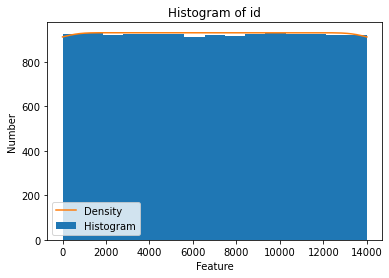

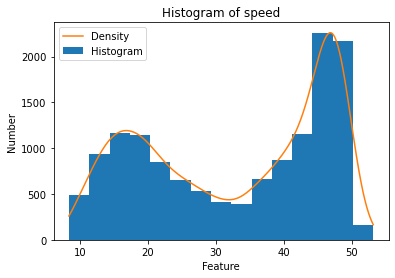

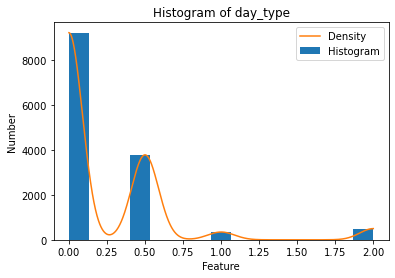

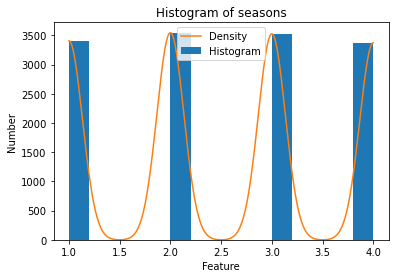

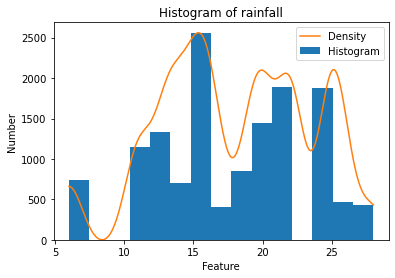

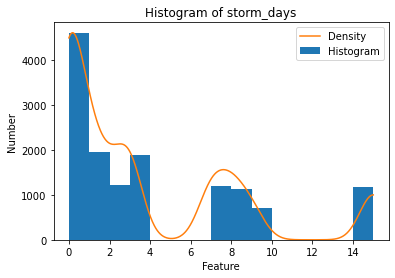

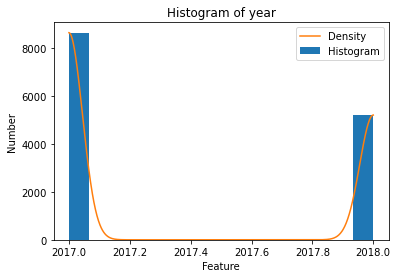

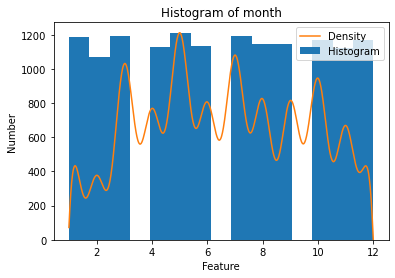

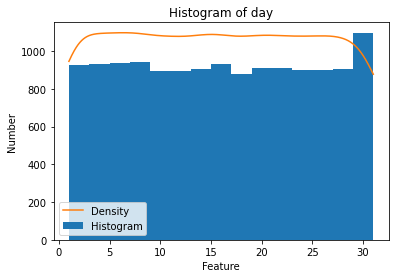

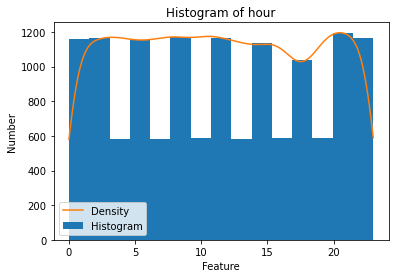

In [16]:
# histogram groupped by all the columns
features = list(dftrain.columns)
 # save all the density model
density_model = {}
# save all the function to do denormalization of the density function (scaling and shift)
density_denorm = {} 
#Denorm function and histogram
denorm_func_factory = lambda kde_min, kde_max, hist_min, hist_max: (lambda y: (y-kde_min)*(hist_max-hist_min)/(kde_max-kde_min)+ hist_min)
for f, feature in enumerate(features):
  d = dftrain[feature].dropna().to_numpy()
  fig, ax = plt.subplots()
  ax.set_title(f'Histogram of {feature}')
  ax.set_xlabel('Feature')
  ax.set_ylabel('Number')
  y_hist, x_hist, _ = ax.hist(d, 15, label='Histogram')
  print(f"{feature}")
  print('count, interverals:', list(zip(y_hist, x_hist[:-1], x_hist[1:])))
  kde = KernelDensity(kernel='gaussian', bandwidth=(x_hist[1]-x_hist[0])/1.5).fit(d[:, np.newaxis])
  x_kde = np.linspace(d.min(), d.max(), 1000)
  log_dens = kde.score_samples(x_kde[:, np.newaxis])
  y_kde = np.exp(log_dens)
  denorm = denorm_func_factory(y_kde.min(), y_kde.max(), y_hist.min(), y_hist.max())
  # y_kde_denorm = (y_kde-y_kde.min())*((y_hist.max()-y_hist.min())/(y_kde.max()-y_kde.min()))+y_hist.min()
  y_kde_denorm = denorm(y_kde)
  ax.plot(x_kde, y_kde_denorm, label='Density')
  ax.legend()
  density_model[feature] = kde
  density_denorm[feature] = denorm

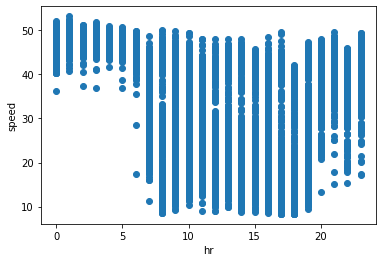

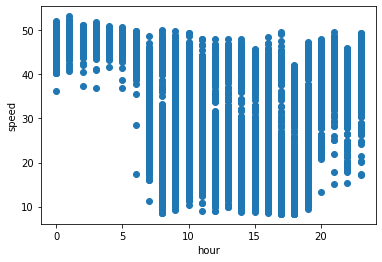

In [17]:
# hour 
x = dftrain['hour'].to_numpy()
y = dftrain['speed'].to_numpy()

plt.scatter(x,y)
plt.xlabel('hr')
plt.ylabel('speed')
plt.show()

# day
x = dftrain['hour'].to_numpy()
y = dftrain['speed'].to_numpy()

plt.scatter(x,y)
plt.xlabel('hour')
plt.ylabel('speed')
plt.show()



In [18]:
#Review x, y, ytest
print(x.shape)
print(y.shape)
print(ytest.shape)

(13860,)
(13860,)
(3504, 5)


In [19]:
#OUTLIERS Checking out
an_array = np.array(y)
mean = np.mean(an_array)
standard_deviation = np.std(an_array)
distance_from_mean = abs(an_array - mean)
max_deviations = 1.9
not_outlier = distance_from_mean < max_deviations * standard_deviation
outliers = distance_from_mean > max_deviations * standard_deviation
no_outliers = an_array[not_outlier]
outlier = an_array[outliers]

print(no_outliers.shape)
print(outlier)

(13860,)
[]


In [20]:
#Reshape to 2 D

x = np.expand_dims(x, axis=1)
y = np.expand_dims(y, axis=1)
ytest = dftest['hour'].to_numpy()
ytest = np.expand_dims(ytest, axis=1)

print(x.shape)
print(y.shape)
print(ytest.shape)

(13860, 1)
(13860, 1)
(3504, 1)


## Creting new variables based on features 

In [21]:
#Prueb
xday = dftrain['day']
xhour = dftrain['hour']
xyear = dftrain['year']
xmonth = dftrain['month']
xday_type = dftrain['day_type']
xseasons = dftrain['seasons']
xrainfall = dftrain['rainfall']
xstorm_days = dftrain['storm_days']

xdate = np.concatenate([[xyear,xmonth, xday, xhour,xday_type,xseasons,xrainfall,xstorm_days]])

print(xdate.shape)

(8, 13860)


In [22]:
xday = dftrain['day']
xhour = dftrain['hour']
xyear = dftrain['year']
xmonth = dftrain['month']
xday_type = dftrain['day_type']
xseasons = dftrain['seasons']
xrainfall = dftrain['rainfall']
xstorm_days = dftrain['storm_days']

xday = np.expand_dims(xday, axis=1)
xhour = np.expand_dims(xhour, axis=1)
xyear = np.expand_dims(xyear, axis=1)
xmonth = np.expand_dims(xmonth, axis=1)
xday_type= np.expand_dims(xday_type, axis=1)
xseasons = np.expand_dims(xseasons, axis=1)
xrainfall= np.expand_dims(xrainfall, axis=1)
xstorm_days = np.expand_dims(xstorm_days, axis=1)
xdate = np.concatenate((xyear,xmonth, xday, xhour,xday_type,xseasons,xrainfall,xstorm_days), axis=1)

In [23]:
print(xdate.shape)

(13860, 8)


In [24]:
ytesthour = dftest['hour'].to_numpy()
ytesthour = np.expand_dims(ytesthour, axis=1)
ytestday = dftest['day'].to_numpy()
ytestday = np.expand_dims(ytestday, axis=1)
ytestyear = dftest['year'].to_numpy()
ytestyear = np.expand_dims(ytestyear, axis=1)
ytestmonth = dftest['month'].to_numpy()
ytestmonth = np.expand_dims(ytestmonth, axis=1)
ytestday_type = dftest['day_type'].to_numpy()
ytestday_type = np.expand_dims(ytestday_type, axis=1)
ytestseasons = dftest['seasons'].to_numpy()
ytestseasons = np.expand_dims(ytestseasons, axis=1)
ytestrainfall = dftest['rainfall'].to_numpy()
ytestrainfall = np.expand_dims(ytestrainfall, axis=1)
yteststorm_days = dftest['storm_days'].to_numpy()
yteststorm_days = np.expand_dims(yteststorm_days, axis=1)

ytestdate = np.concatenate((ytestyear, ytestmonth, ytestday, ytesthour, ytestday_type, ytestseasons, ytestrainfall, yteststorm_days), axis=1)


print(ytestdate.shape)

(3504, 8)


In [25]:
ytestdate, xdate, y

(array([[2.018e+03, 1.000e+00, 1.000e+00, ..., 1.000e+00, 1.500e+01,
         0.000e+00],
        [2.018e+03, 1.000e+00, 1.000e+00, ..., 1.000e+00, 1.500e+01,
         0.000e+00],
        [2.018e+03, 1.000e+00, 1.000e+00, ..., 1.000e+00, 1.500e+01,
         0.000e+00],
        ...,
        [2.018e+03, 1.200e+01, 3.100e+01, ..., 1.000e+00, 1.300e+01,
         0.000e+00],
        [2.018e+03, 1.200e+01, 3.100e+01, ..., 1.000e+00, 1.300e+01,
         0.000e+00],
        [2.018e+03, 1.200e+01, 3.100e+01, ..., 1.000e+00, 1.300e+01,
         0.000e+00]]),
 array([[2.017e+03, 1.000e+00, 1.000e+00, ..., 1.000e+00, 1.100e+01,
         0.000e+00],
        [2.017e+03, 1.000e+00, 1.000e+00, ..., 1.000e+00, 1.100e+01,
         0.000e+00],
        [2.017e+03, 1.000e+00, 1.000e+00, ..., 1.000e+00, 1.100e+01,
         0.000e+00],
        ...,
        [2.018e+03, 1.200e+01, 3.100e+01, ..., 1.000e+00, 1.300e+01,
         0.000e+00],
        [2.018e+03, 1.200e+01, 3.100e+01, ..., 1.000e+00, 1.300e+01,
   

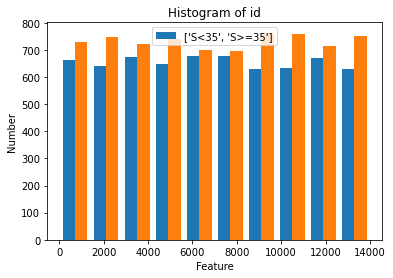

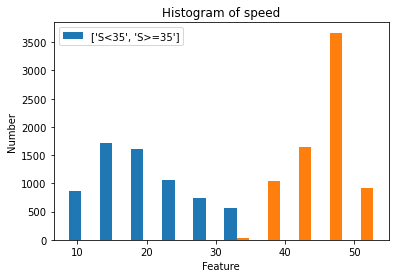

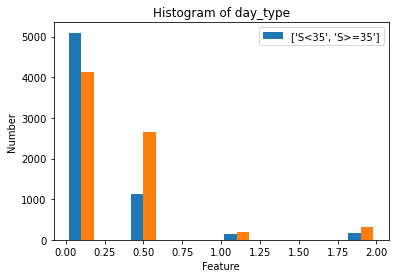

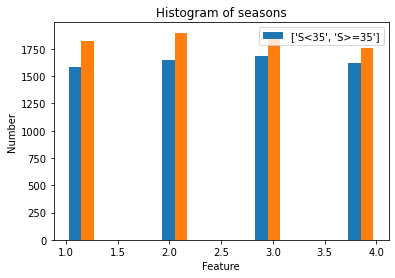

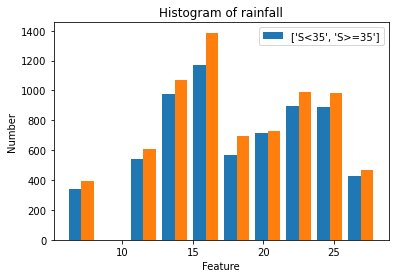

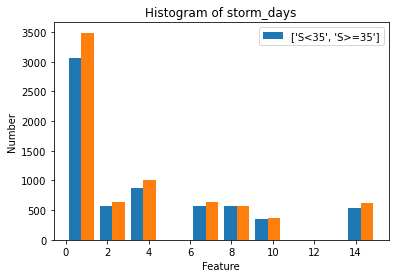

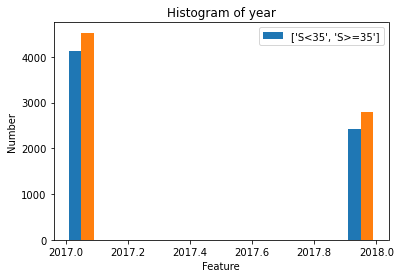

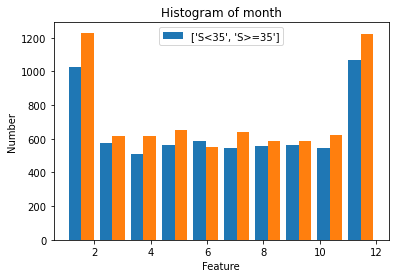

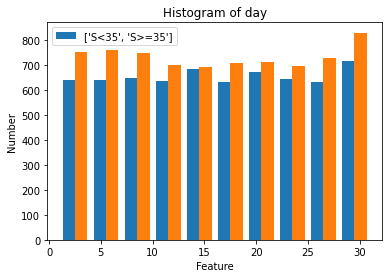

In [26]:
# histogram groupped by Speed's interval VS Features
for f, feature in enumerate(features[:-1]):
  s_1 = dftrain[dftrain['speed']<35]
  s_2 = dftrain[dftrain['speed']>=35]
  fig, ax = plt.subplots()
  ax.set_title(f'Histogram of {feature}')
  ax.set_xlabel('Feature')
  ax.set_ylabel('Number')
  ax.hist([s_1[feature].dropna().to_numpy(),s_2[feature].dropna().to_numpy()], 10, label=[['S<35','S>=35']])
  ax.legend()

### Matrix Correlation

In [27]:
# Correlation

corr_matrix = dftrain.corr()
print('Correlation Matrix')
corr_matrix

Correlation Matrix


,id,speed,day_type,seasons,rainfall,storm_days,year,month,day,hour
id,1.000000,-0.001011,-0.038024,0.301584,0.029744,-0.003732,0.838988,0.319792,0.122222,0.005280
speed,-0.001011,1.000000,0.178703,-0.029409,-0.015586,-0.013852,0.013045,-0.022739,-0.014306,-0.382483
day_type,-0.038024,0.178703,1.000000,-0.069528,-0.111414,-0.054805,-0.030200,-0.121508,-0.000478,0.005191
seasons,0.301584,-0.029409,-0.069528,1.000000,0.519453,0.389244,-0.006694,0.343899,0.093097,-0.002991
rainfall,0.029744,-0.015586,-0.111414,0.519453,1.000000,0.748596,0.062788,0.002708,-0.001174,-0.000177
storm_days,-0.003732,-0.013852,-0.054805,0.389244,0.748596,1.000000,-0.086963,0.077356,0.020344,0.001233
year,0.838988,0.013045,-0.030200,-0.006694,0.062788,-0.086963,1.000000,-0.006716,-0.008038,0.006319
month,0.319792,-0.022739,-0.121508,0.343899,0.002708,0.077356,-0.006716,1.000000,0.003794,-0.003124
day,0.122222,-0.014306,-0.000478,0.093097,-0.001174,0.020344,-0.008038,0.003794,1.000000,-0.000373
hour,0.005280,-0.382483,0.005191,-0.002991,-0.000177,0.001233,0.006319,-0.003124,-0.000373,1.000000


In [28]:
# Model KNeighbors for training test x,y
import sklearn.neighbors
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors= 24)
model.fit(x,y)
predict_y = model.predict(ytest)
print(predict_y)

model.get_params()

[[47.62644145]
 [46.29046487]
 [32.88728265]
 ...
 [41.21871361]
 [36.54674238]
 [41.44293266]]


{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 24,
 'p': 2,
 'weights': 'uniform'}

In [29]:
pd.DataFrame(predict_y).to_csv('Predictspeed.csv',header = None, index=None)

Predictspeed = pd.read_csv('Predictspeed.csv')
Predictspeed.info(), Predictspeed.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3503 entries, 0 to 3502
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   47.62644144750001  3503 non-null   float64
dtypes: float64(1)
memory usage: 27.5 KB


(None,
        47.62644144750001
 count        3503.000000
 mean           32.859097
 std            11.583578
 min            15.991970
 25%            21.181603
 50%            30.069351
 75%            46.290465
 max            48.824097)

In [30]:
#SPLIT data
xdate_train,xdate_test,y_train,y_test=train_test_split(xdate,y,test_size=0.2,random_state=123)


#compute model and predictions LR
model_trainLR = LinearRegression()
model_trainLR.fit(xdate_train, y_train)
predict_y_trainLR = model_trainLR.predict(xdate_test)
ytrue = xdate_test
#compute error
error = predict_y_trainLR - y_test
#Compute Root Mean Square Error and Mean Absolute Error
rmse = (error**2).mean()**.5
mae = abs(error).mean()
print('LR, RMSE: '+ str(rmse))
print('LR, MAE: '+ str(mae))
print('Accuracy LR :'+str(model_trainLR.score(xdate_train,y_train)))

LR, RMSE: 12.085706944205388
LR, MAE: 10.8720078812698
Accuracy LR :0.17707866251718207


In [31]:
#Compute model and predictions DTR
model_trainDTR = DecisionTreeRegressor(max_depth=12)
model_trainDTR.fit(xdate_train, y_train)
predict_y_trainDTR = model_trainDTR.predict(xdate_test)
ytrue = xdate_test
#compute error RMSE,MAE using mean_squared from sklearn
print('DTR with max_depth =' + str(mean_squared_error(predict_y_trainDTR, y_test)**0.5))
print('Accuracy DTR :'+str(model_trainDTR.score(xdate_train,y_train)))


DTR with max_depth =5.952218042037761
Accuracy DTR :0.886491401458702


In [32]:
#Compute model and predictions KNN
model_trainKNN = sklearn.neighbors.KNeighborsRegressor(n_neighbors= 24)
model_trainKNN.fit(xdate_train, y_train)
predict_y_trainKNN = model_trainKNN.predict(xdate_test)
ytrue = xdate_test
#compute error RMSE,MAE using mean_squared from sklearn
print('KNN =' + str(mean_squared_error(predict_y_trainKNN, y_test)**0.5))
print('Accuracy KNN :'+str(model_trainKNN.score(xdate_train,y_train)))


KNN =7.752829492506543
Accuracy KNN :0.6982720264225173


In [33]:
#Compute model and predictions RFR
model_trainRFR= RandomForestRegressor(max_depth=24, random_state=24)
model_trainRFR.fit(xdate_train, y_train)
predict_y_trainRFR = model_trainRFR.predict(xdate_test)
ytrue = xdate_test
#compute error RMSE,MAE using mean_squared from sklearn
print('RFR =' + str(mean_squared_error(predict_y_trainRFR, y_test)**0.5))
print('Accuracy RFR :'+str(model_trainRFR.score(xdate_train,y_train)))


<ipython-input-33-dd944e16be6c>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trainRFR.fit(xdate_train, y_train)


RFR =4.852009096933802
Accuracy RFR :0.9802714196654402


##############KNR,52
[[47.94263769]
 [45.78768329]
 [35.12674153]
 ...
 [34.30586941]
 [36.80344963]
 [37.8029934 ]]
0.7111417694274371


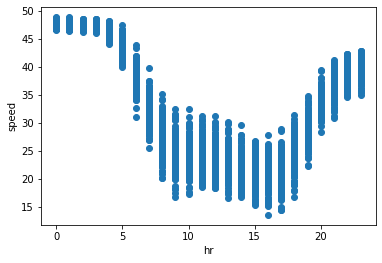

##############LR,120
[[50.99306247]
 [48.77167004]
 [47.29074175]
 ...
 [30.96211604]
 [30.2216519 ]
 [29.48118775]]
[[ 0.49934026  0.03684452 -0.01703212 -0.74046414  5.7237805  -0.36022626
   0.06633671 -0.03314992]]
0.18016160492963407


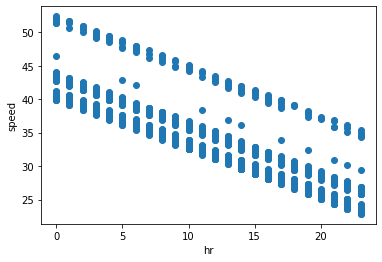

##############DTR,56
[47.64815463 46.53195983 45.25589692 ... 42.02344641 34.76074992
 46.54941922]
0.8818692620738806


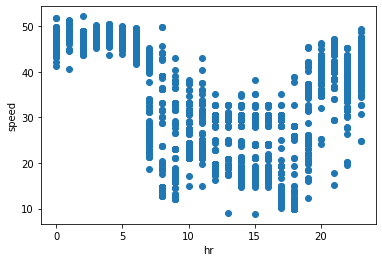

##############RFR,49


<ipython-input-34-86df8b9cdc27>:64: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(xdate,y)


[46.56203823 46.68202179 41.62742041 ... 40.95005749 37.9364447
 40.86969396]
0.9818445351257818


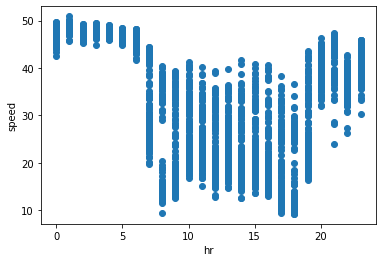

In [34]:
# Model KNeighbors for training test x,y and GRAPHS
import sklearn.neighbors

print('##############KNR,52')
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors= 24)
model.fit(xdate,y) 
predict_yKn = model.predict(ytestdate)
print(predict_yKn)
print(model.score(xdate,y))

plt.scatter(ytest,predict_yKn)
plt.xlabel('hr')
plt.ylabel('speed')
plt.show()

print('##############LR,120')

# Model LinearRegression for training test x,y
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xdate,y) 
predict_yLr = model.predict(ytestdate)
print(predict_yLr)
print(model.coef_)
print(model.score(xdate,y))

plt.scatter(ytest,predict_yLr)
plt.xlabel('hr')
plt.ylabel('speed')
plt.show()

print('##############DTR,56')

# Model Decision Tree Regressor
model = DecisionTreeRegressor(max_depth=12)
model.fit(xdate, y)
predict_yDTR = model.predict(ytestdate)
print(predict_yDTR)
print(model.score(xdate,y))

plt.scatter(ytest,predict_yDTR)
plt.xlabel('hr')
plt.ylabel('speed')
plt.show()

#print('##############DTC,') #This model is not use because Speed is continuos
#from sklearn import tree **PP275,book DataSfMA**
# MODEL DECISION TREE CLASSIFIER
#model = tree.DecisionTreeClassifier()
#model.fit(xdate, y)
#predict_yDTC = model.predict(ytestdate)
#print(predict_yDTC)
#print(model.score(xdate,y))

#plt.scatter(ytest,predict_yDTC)
#plt.xlabel('hr')
#plt.ylabel('speed')
#plt.show()}

print('##############RFR,49')

#Model Random Forest Regressor
model = RandomForestRegressor(max_depth=24, random_state=24)
model.fit(xdate,y) 
predict_yRFR = model.predict(ytestdate)
print(predict_yRFR)
print(model.score(xdate,y))

plt.scatter(ytest,predict_yRFR)
plt.xlabel('hr')
plt.ylabel('speed')
plt.show()


#print('##############DTC,') #This model is not use because Speed is continuos
#from sklearn.ensemble import RandomForestClassifier **PP275,book DataSfMA**
# MODEL RANDOM FOREST CLASSIFIER
#model = RandomForestClassifier(n_estimators=20, max_depth=None, min_samples_split=7, random_state=0)
#model.fit(xdate, y)
#predict_yRFC = model.predict(ytestdate)
#print(predict_yRFC)
#print(model.score(xdate,y))

#plt.scatter(ytest,predict_yRFC)
#plt.xlabel('hr')
#plt.ylabel('speed')
#plt.show()}


In [35]:
#Load file and predictions
pd.DataFrame(predict_yKn).to_csv('PredictspeedKN.csv',header = None, index=None)
pd.DataFrame(predict_yLr).to_csv('PredictspeedLR.csv',header = None, index=None)
pd.DataFrame(predict_yDTR).to_csv('PredictspeedDTR.csv',header = None, index=None)
pd.DataFrame(predict_yRFR).to_csv('PredictspeedRFR.csv',header = None, index=None)

print('################# KN')

PredictspeedKN = pd.read_csv('PredictspeedKN.csv')
print(PredictspeedKN.info(), PredictspeedKN.describe())

print('#################LR')

PredictspeedLR = pd.read_csv('PredictspeedLR.csv')
print(PredictspeedLR.info(), PredictspeedLR.describe())

print('#################DTR')

PredictspeedDTR = pd.read_csv('PredictspeedDTR.csv')
print(PredictspeedDTR.info(), PredictspeedDTR.describe())

print('#################RFR')

PredictspeedRFR = pd.read_csv('PredictspeedRFR.csv')
print(PredictspeedRFR.info(), PredictspeedRFR.describe())

################# KN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3503 entries, 0 to 3502
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   47.94263768583334  3503 non-null   float64
dtypes: float64(1)
memory usage: 27.5 KB
None        47.94263768583334
count        3503.000000
mean           32.880688
std            10.291397
min            13.621411
25%            23.445549
50%            31.077543
75%            42.260603
max            48.882926
#################LR
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3503 entries, 0 to 3502
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   50.99306246801393  3503 non-null   float64
dtypes: float64(1)
memory usage: 27.5 KB
None        50.99306246801393
count        3503.000000
mean           33.305884
std             5.634688
min            22.852268
25%            28

## Data Scaling
### Classifier's Models

In [36]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13860 entries, 0 to 14005
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          13860 non-null  int64  
 1   speed       13860 non-null  float64
 2   day_type    13860 non-null  float64
 3   seasons     13860 non-null  int64  
 4   rainfall    13860 non-null  int64  
 5   storm_days  13860 non-null  int64  
 6   year        13860 non-null  int64  
 7   month       13860 non-null  int64  
 8   day         13860 non-null  int64  
 9   hour        13860 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.2 MB


In [37]:
from sklearn import preprocessing
from sklearn import utils
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,confusion_matrix

dftrain['speed'] = dftrain['speed'].astype(np.int64)
data = dftrain
# Scaling the data and prepare for the modeling
scaler_X = StandardScaler()
X =  pd.DataFrame(scaler_X.fit_transform(data.drop(["speed"],axis = 1),),
        columns=['id','day_type','seasons','rainfall','storm_days','year','month','day','hour'])
y = data.speed

train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=1/3,random_state=42)

traindata = pd.concat([train_X, train_y], axis=1)
testdata = pd.concat([test_X, test_y], axis=1)

In [38]:
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
def KNN_find_best_k(train_X,test_X,train_y,test_y):
    
    #When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.
    param_grid = dict(n_neighbors=list(range(1,51)),weights=['uniform','distance'],p=[1,2])
    knn =sklearn.neighbors.KNeighborsClassifier()
    #CV with 5-folds
    grid = GridSearchCV(knn,param_grid,cv=5,scoring='accuracy')

    grid.fit(train_X, train_y)
    print('Best average training score (cv = 5): {} with parametres: {}'.format(grid.best_score_,grid.best_params_))
    print()
    
    knn = KNeighborsClassifier(**grid.best_params_)
    knn.fit(train_X, train_y)
    
    print(' ',grid.best_params_)

    y_predict_test = knn.predict(test_X)
    y_predict_train = knn.predict(train_X)

    cm_test = confusion_matrix(test_y,y_predict_test)
    cm_train = confusion_matrix(train_y,y_predict_train)

    acc_test = accuracy_score(test_y,y_predict_test)  
    acc_train = accuracy_score(train_y,y_predict_train)

    print('Test Score: {}, Train Score: {}'.format(acc_test,acc_train))
    print()
    #print('CM Test:',cm_test)
    #print('CM Train:',cm_train)

    return grid,acc_test

In [39]:
grid,KNNscore = KNN_find_best_k(train_X,test_X,train_y,test_y)
#KNNscore = grid.best_score_
print("Test score of KNN: ",KNNscore)

Best average training score (cv = 5): 0.11374458874458875 with parametres: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}

  {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Test Score: 0.10757575757575757, Train Score: 1.0

Test score of KNN:  0.10757575757575757


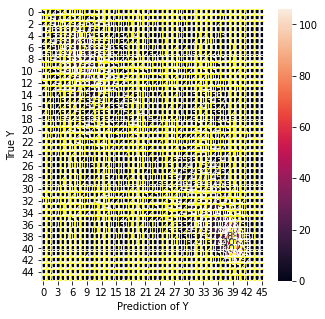

In [40]:
#Confusion matrix
#KNN model with k =31,p = 1, weights = 'uniform'
knn = KNeighborsClassifier(n_neighbors =19,p = 2, weights = 'distance')
knn.fit(train_X, train_y)
yKNNprediciton= knn.predict(test_X)
ytrue = test_y
CM = confusion_matrix(ytrue,yKNNprediciton)

##Output the Matrix for KNN
f, axs = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="yellow",fmt=".0f",ax=axs)
plt.xlabel("Prediction of Y")
plt.ylabel("True Y")
plt.show()

Best score for Optimum k =  68 is 0.129004329004329


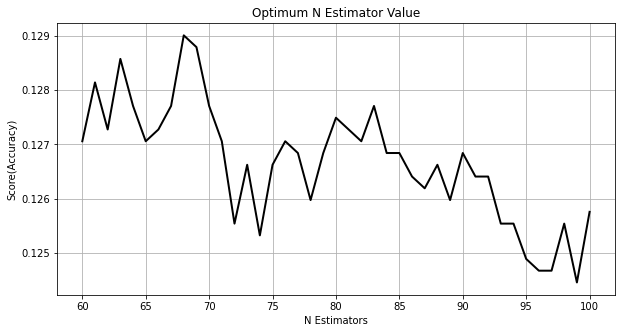

Test Score: 0.12575757575757576, Train Score: 1.0


In [41]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

#Find scores with diff K value
score_val = []
for each in range(60,101):
    RFC_temp = RandomForestClassifier(n_estimators = each, random_state=42)
    RFC_temp.fit(train_X,train_y)
    score_val.append(RFC_temp.score(test_X,test_y))

print('Best score for Optimum k = ',score_val.index(max(score_val))+60,'is',max(score_val))

plt.figure(1, figsize=(10, 5))
plt.plot(range(60,101),score_val,color="black",linewidth=2)
plt.title("Optimum N Estimator Value")
plt.xlabel("N Estimators")
plt.ylabel("Score(Accuracy)")
plt.grid(True)
plt.show()

y_predict_testRF = RFC_temp.predict(test_X)
y_predict_trainRF = RFC_temp.predict(train_X)
    
acc_testRF = accuracy_score(test_y,y_predict_testRF)  
acc_trainRF = accuracy_score(train_y,y_predict_trainRF)

print('Test Score: {}, Train Score: {}'.format(acc_testRF,acc_trainRF))

Average Accuracies:  0.125974025974026
Standart Deviation Accuracies:  0.006533068516357825
Random Forest Score:  0.129004329004329


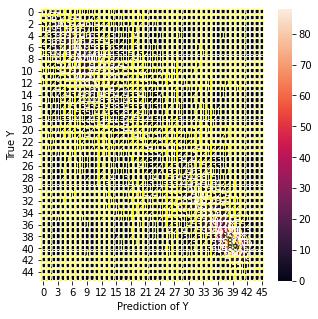

In [42]:
#RFC model
RFC= RandomForestClassifier(n_estimators = 68, random_state=42) #n_estimator = 77
RFC.fit(train_X,train_y) 

#K-fold CV
accuraccies = cross_val_score(estimator = RFC, X= train_X, y=train_y, cv=5)
print("Average Accuracies: ",np.mean(accuraccies))
print("Standart Deviation Accuracies: ",np.std(accuraccies))
print("Random Forest Score: ",RFC.score(test_X,test_y))
RFCscore=RFC.score(test_X,test_y)

#Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

predict_y_trainRFR= RFC.predict(test_X)
ytrue = test_y
CM = confusion_matrix(ytrue,predict_y_trainRFR)

#CM plot
f, axs = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="yellow",fmt=".0f",ax=axs)
plt.xlabel("Prediction of Y")
plt.ylabel("True Y")
plt.show()

## Conclusion

Based on previous models, Im going to use Random Forest Regressor because thata model performs better in accuracy. Also Im going to use n estimators 68 as assumpyion of best n_estimators number.

In [43]:
#Compute model and predictions RFR
model_trainRFR= RandomForestRegressor(max_depth=68, random_state=24)
model_trainRFR.fit(xdate_train, y_train)
predict_y_trainRFR_1 = model_trainRFR.predict(xdate_test)
ytrue = xdate_test
#compute error RMSE,MAE using mean_squared from sklearn
print('RFR =' + str(mean_squared_error(predict_y_trainRFR_1, y_test)**0.5))
print('Accuracy RFR :'+str(model_trainRFR.score(xdate_train,y_train)))


<ipython-input-43-62acbd19718d>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trainRFR.fit(xdate_train, y_train)


RFR =4.851963776205008
Accuracy RFR :0.9806649507339968


In [44]:
#Model Random Forest Regressor
model = RandomForestRegressor(max_depth=68, random_state=24)
model.fit(xdate,y) 
predict_yRFR_1 = model.predict(ytestdate)
print(predict_yRFR_1)
print(model.score(xdate,y))


[45.71 46.16 41.52 ... 40.73 37.47 40.47]
0.982908950256253


In [45]:
pd.DataFrame(predict_yRFR_1).to_csv('PredictspeedRFR_1.csv',header = None, index=None)

print('################# RFR_1')

PredictspeedRFR_1 = pd.read_csv('PredictspeedRFR_1.csv')
print(PredictspeedRFR_1.info(), PredictspeedRFR_1.describe())

################# RFR_1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3503 entries, 0 to 3502
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   45.71   3503 non-null   float64
dtypes: float64(1)
memory usage: 27.5 KB
None              45.71
count  3503.000000
mean     32.440551
std      12.684913
min       8.340000
25%      19.960000
50%      34.230000
75%      45.645000
max      50.690000
